## Processing of SNVs present in parental DENV population

Sequencing was done in 4 overlapping amplicons. The read depth of the sequencing run was non-sensibly high and therefore it was downsampled, subsequently variants were called using LoFreq. 

Here SNVs of the 4 amplicons are combined and filtered to only include SNVs occurring in between the primers.


In [1]:
from pysam import VariantFile
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from scipy.optimize import curve_fit
from scipy.misc import factorial
import scipy
from scipy import stats
import Bio
from Bio import SeqIO
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_name["Standard"]

In [2]:
dataDir = "/Users/felix/Documents/arbovirusGenetics/DENV_ZIKV_singelCell/DENVparentalSeq/DENVpar_var/"
os.chdir(dataDir)
varFiles = glob.glob('*.vcf')

In [3]:
#### Only include SNVs in between primers of 4 amplicons

vfSNVamp1 = VariantFile(varFiles[0])
SNVa1 = pd.DataFrame(columns=['pos', 'af'])
for rec in vfSNVamp1.fetch():
    if rec.pos > 32 and rec.pos < 3667:
        df = pd.DataFrame([[rec.pos, rec.info["AF"]]], columns = ['pos', 'af'])
        SNVa1 = SNVa1.append(df, ignore_index = True)

vfSNVamp2 = VariantFile(varFiles[1])
SNVa2 = pd.DataFrame(columns=['pos', 'af'])
for rec in vfSNVamp2.fetch():
    if rec.pos > 2431 and rec.pos < 6178:
        df = pd.DataFrame([[rec.pos, rec.info["AF"]]], columns = ['pos', 'af'])
        SNVa2 = SNVa2.append(df, ignore_index = True)
    
vfSNVamp3 = VariantFile(varFiles[2])
SNVa3 = pd.DataFrame(columns=['pos', 'af'])
for rec in vfSNVamp3.fetch():
    if rec.pos > 4937 and rec.pos < 8608:
        df = pd.DataFrame([[rec.pos, rec.info["AF"]]], columns = ['pos', 'af'])
        SNVa3 = SNVa3.append(df, ignore_index = True)
    
vfSNVamp4 = VariantFile(varFiles[3])
SNVa4 = pd.DataFrame(columns=['pos', 'af'])
for rec in vfSNVamp4.fetch():
    if rec.pos > 7310 and rec.pos < 10700:
        df = pd.DataFrame([[rec.pos, rec.info["AF"]]], columns = ['pos', 'af'])
        SNVa4 = SNVa4.append(df, ignore_index = True)


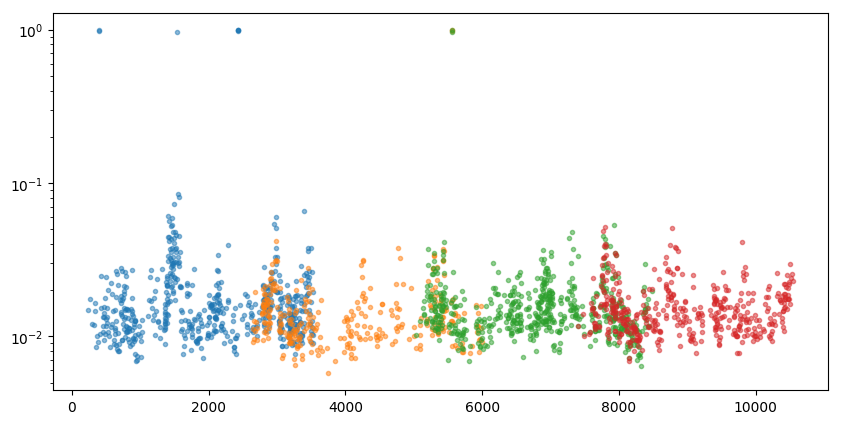

In [4]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(SNVa1.pos, SNVa1.af ,'.', alpha=0.5)
plt.plot(SNVa2.pos, SNVa2.af ,'.', alpha=0.5)
plt.plot(SNVa3.pos, SNVa3.af ,'.', alpha=0.5)
plt.plot(SNVa4.pos, SNVa4.af ,'.', alpha=0.5)
plt.yscale('log')

In [6]:
### total number of SNVs
len(SNVa1) + len(SNVa2) + len(SNVa3) + len(SNVa4)

1929

In [7]:
### Combine SNVs of all 4 amplicons
SNVp = pd.DataFrame(columns=['pos', 'af'])
SNVp = SNVp.append([SNVa1, SNVa2, SNVa3, SNVa4], ignore_index=True)
SNVp.head()

,pos,af
0,239,0.014945
1,261,0.017425
2,301,0.011974
3,326,0.011843
4,335,0.014583


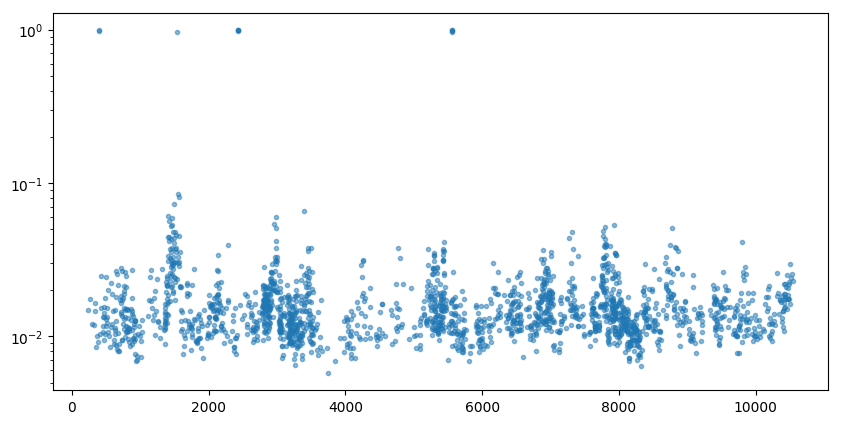

In [8]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(SNVp.pos, SNVp.af ,'.', alpha=0.5)
plt.yscale('log')

In [10]:
%store SNVp

Stored 'SNVp' (DataFrame)
